# Social Network Analysis

In [40]:
import networkx as nx
from matplotlib.pyplot import figure
import pandas as pd

In [41]:
twitch_english_edges = pd.read_csv('twitch/twitch/ENGB/musae_ENGB_edges.csv')
twitch_english_edges
twitch_english_edges.columns = ['FROM','TO']

In [42]:
twitch_english_target = pd.read_csv('twitch/twitch/ENGB/musae_ENGB_target.csv')
twitch_english_target = twitch_english_target[twitch_english_target['partner']==True]
twitch_english_target = twitch_english_target[twitch_english_target['days']<=1460]
twitch_english_target

,id,days,mature,views,partner,new_id
129,91580306,1240,False,1400701,True,4330
243,92845630,1224,False,226172,True,5991
267,158561795,497,True,37500,True,5965
358,137594474,721,False,260098,True,672
377,74125284,1442,False,271830,True,1706
...,...,...,...,...,...,...
6980,143314130,651,False,161155,True,1388
7005,97713895,1170,False,1884448,True,6988
7081,106816634,1066,True,159448,True,5900
7089,82459184,1338,False,908655,True,6435


In [43]:
twitch_english_edges = twitch_english_edges[twitch_english_edges['TO'].isin(twitch_english_target['new_id'].tolist())]

In [44]:
twitch_english_edges

,FROM,TO
19,3,3739
24,4,4087
51,9,2352
88,2811,4639
106,1,3739
...,...,...
35247,6743,6776
35253,6669,6776
35258,6776,6921
35296,6914,6921


# Basic Statistics

In [45]:
G = nx.from_pandas_edgelist(twitch_english_edges, source="FROM", target="TO", create_using=nx.DiGraph())

In [46]:
nodes_interest = list(twitch_english_edges[twitch_english_edges.TO == 3739].FROM) + [3739]

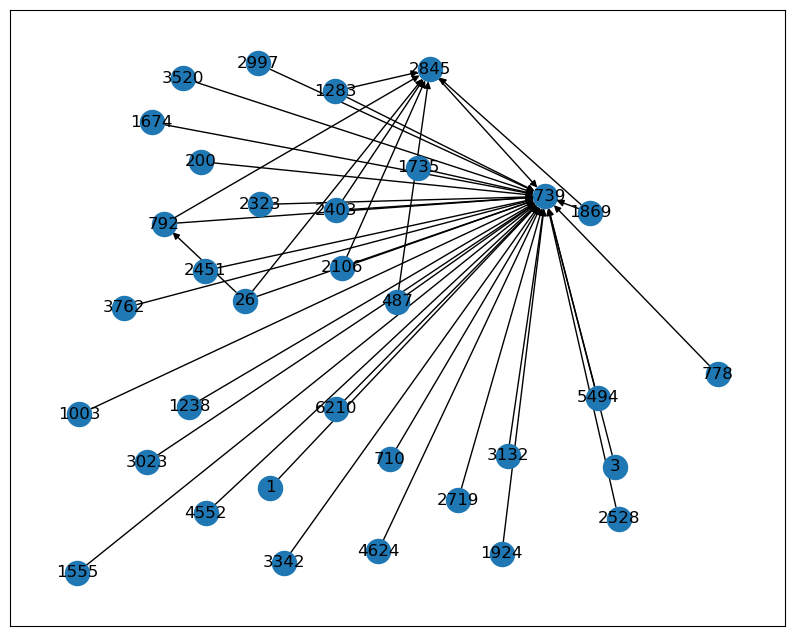

In [47]:
figure(figsize=(10, 8))
nx.draw_networkx(G.subgraph(nodes=nodes_interest), with_labels=True)

In [49]:
G.in_degree[3739]

33

In [50]:
G.out_degree[3739]

3

In [48]:
print(f"Total Number of Nodes: {len(G.nodes)}")
print(f"Total Number of Edges: {len(G.edges)}")
print(f"Density: {nx.density(G)}")
print(f"Transitivity: {nx.transitivity(G)}")

Total Number of Nodes: 1035
Total Number of Edges: 1367
Density: 0.0012773432754931368
Transitivity: 0.08394698085419734


In [56]:
list(nx.simple_paths.all_simple_paths(G, source=2403, target=4639))

[[2403, 2904, 4639], [2403, 3739, 4639], [2403, 2845, 3739, 4639]]

In [58]:
list(nx.shortest_path(G, source=2403, target=4639))

[2403, 2904, 4639]

In [60]:
nx.shortest_path_length(G, source=2403, target=4639)

2

In [66]:
twitch_degree = G.degree()
sorted(dict(twitch_degree).items(), key=lambda kv: kv[1], reverse=True)[:10]

[(4639, 76),
 (6921, 73),
 (5138, 64),
 (6776, 64),
 (4087, 52),
 (2845, 52),
 (3867, 49),
 (2928, 47),
 (2887, 46),
 (5789, 44)]

# Node Importance

## Degree Centrality

In [67]:
twitch_degree_centrality = nx.degree_centrality(G)
sorted(twitch_degree_centrality.items(), key=lambda kv: kv[1], reverse=True)[:10]

[(4639, 0.0735009671179884),
 (6921, 0.07059961315280465),
 (5138, 0.061895551257253385),
 (6776, 0.061895551257253385),
 (4087, 0.05029013539651837),
 (2845, 0.05029013539651837),
 (3867, 0.047388781431334626),
 (2928, 0.045454545454545456),
 (2887, 0.04448742746615087),
 (5789, 0.0425531914893617)]

## Betweeness Centrality

In [68]:
twitch_betweenness_centrality = nx.betweenness_centrality(G, weight=None)
sorted(twitch_betweenness_centrality.items(), key=lambda kv: kv[1], reverse=True)[:10]

[(2845, 0.00042348470805145234),
 (3739, 0.00039009276718077776),
 (792, 0.00022048043201057556),
 (4639, 0.00020035164522404743),
 (1414, 0.00019918136692250512),
 (5730, 0.00015166806787988638),
 (2928, 0.00013793680247512302),
 (5138, 0.00011780801568859488),
 (4080, 0.00011141049430683012),
 (3867, 0.00010618325122660768)]

## Closeness Centrality

In [69]:
twitch_closeness_centrality = nx.closeness_centrality(G, distance=None)
sorted(twitch_closeness_centrality.items(), key=lambda kv: kv[1], reverse=True)[:10]

[(5538, 0.11404685739792123),
 (6921, 0.11241151115867608),
 (4639, 0.10991456360519584),
 (5354, 0.09459857386183204),
 (3867, 0.08192374306266673),
 (5138, 0.07536383815415812),
 (4330, 0.07297574377181065),
 (6776, 0.06431838330109606),
 (3739, 0.05421266984634237),
 (4087, 0.05029013539651837)]

## Eigen Centrality

In [72]:
eigen = nx.eigenvector_centrality(G,max_iter=1000)
sorted(eigen.items(), key=lambda kv: kv[1], reverse=True)[:10]

[(5538, 0.9967432390533529),
 (5354, 0.05919498467768828),
 (5138, 0.05450632700823007),
 (4639, 0.0027911411822901027),
 (4330, 0.0026068328735476603),
 (4080, 0.0025940858968388925),
 (6921, 0.0025063195065598803),
 (5624, 0.0003725861628079747),
 (6475, 0.0003725814111782525),
 (3867, 0.00011449096367658562)]

## Visualization

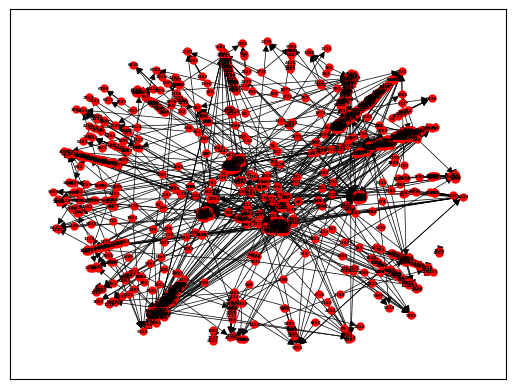

In [73]:
nx.draw_networkx(G, pos=nx.spring_layout(G),
        with_labels = True, font_size=3, font_weight='bold',
        width=0.5, node_size=25, node_color='red')

In [74]:
from pyvis.network import Network as net
from IPython.core.display import display, HTML

In [79]:
G_plot = nx.from_pandas_edgelist(twitch_english_edges, source = "FROM", target ="TO", create_using=nx.DiGraph())

node_degree = dict(G_plot.degree)
nx.set_node_attributes(G_plot, node_degree, 'size')
nt = net(notebook=True, cdn_resources='remote', bgcolor="#000000", font_color="white",select_menu=True)
nt.repulsion()
nt.from_nx(G_plot)
nt.show('twitch_network.html')

twitch_network.html


## Communities

In [80]:
import infomap
from cdlib import algorithms, evaluation, viz

## Girvan & Newman Clustering

In [94]:
import numpy as np
np.random.seed(1)
coms_edge_betweenness = algorithms.girvan_newman(G, level=6)

In [95]:
pos = nx.layout.spring_layout(G)

No. of Communities 13
Community List: [[1, 2049, 3, 4, 2056, 9, 2059, 19, 21, 4119, 24, 26, 2074, 30, 2079, 4126, 4129, 6178, 2082, 4130, 37, 4133, 4128, 2088, 2090, 6187, 4140, 4142, 46, 2096, 2095, 52, 2106, 58, 6207, 65, 6210, 69, 4165, 2120, 4168, 75, 2125, 2126, 6223, 77, 81, 82, 85, 4184, 89, 2138, 91, 93, 94, 2143, 6238, 99, 4196, 2148, 100, 4199, 104, 2154, 112, 2163, 4213, 4214, 120, 127, 2177, 130, 2179, 132, 2181, 134, 2182, 2184, 131, 2186, 2187, 138, 141, 135, 4242, 147, 2195, 4246, 151, 153, 4250, 157, 4256, 161, 2212, 4261, 166, 2215, 168, 169, 2218, 2213, 172, 174, 6320, 2225, 4274, 179, 4275, 178, 189, 2243, 196, 200, 201, 4303, 208, 2257, 2258, 211, 2262, 2265, 221, 6365, 2271, 2275, 6375, 2279, 4330, 239, 240, 6387, 243, 4341, 245, 4342, 2295, 249, 250, 251, 4347, 4349, 253, 246, 2306, 261, 263, 4359, 2317, 4365, 272, 2321, 2323, 275, 4372, 4374, 6424, 2334, 2338, 291, 4392, 6442, 301, 302, 2352, 4406, 314, 2365, 6464, 320, 2375, 2377, 6474, 6475, 2381, 6481, 2387, 2

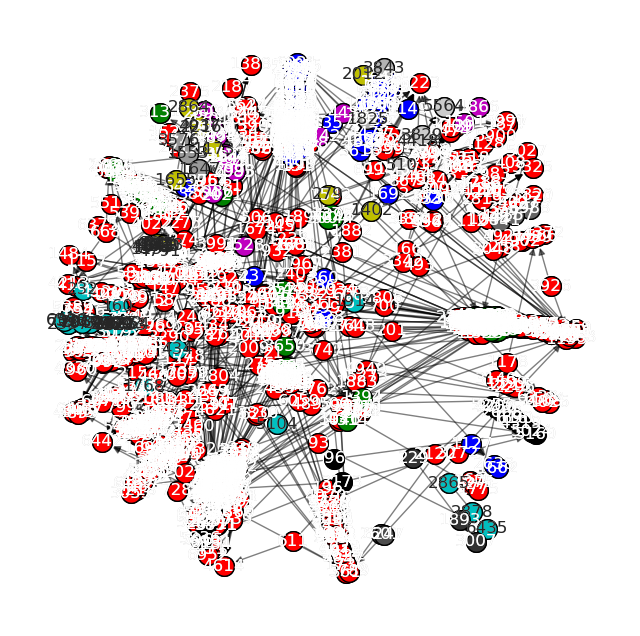

In [96]:
viz.plot_network_clusters(G, coms_edge_betweenness, pos, plot_labels=True)
print("No. of Communities "+str(len(coms_edge_betweenness.communities)))
print("Community List: " + str(coms_edge_betweenness.communities))
print("Conductance: " + str(coms_edge_betweenness.conductance()))
print("Expansion: " + str(coms_edge_betweenness.expansion()))
print("Internal Density: " + str(coms_edge_betweenness.internal_edge_density()))

In [103]:
np.random.seed(1)
updated_G = G.to_undirected()
coms_louvain = algorithms.louvain(updated_G, resolution=1)

No. of Communities 25
Community List: [[21, 1414, 710, 52, 5931, 69, 3504, 81, 5624, 91, 157, 5293, 178, 251, 253, 5730, 434, 469, 475, 6475, 489, 529, 542, 573, 620, 4035, 4611, 799, 885, 1321, 919, 937, 3685, 1066, 1075, 1089, 1104, 1129, 1170, 1280, 1313, 2873, 1369, 1434, 1547, 1557, 1559, 1568, 1633, 6365, 1691, 3399, 1449, 1820, 1839, 1841, 3830, 2005, 2059, 2061, 2177, 2186, 2377, 2387, 2547, 5141, 2662, 2719, 2784, 2883, 2907, 3864, 2957, 2997, 4184, 3010, 4303, 3075, 4624, 3089, 3192, 3322, 3335, 3353, 3394, 3467, 3688, 3747, 3754, 1533, 3806, 3967, 4001, 4052, 4142, 4196, 4199, 4275, 4341, 4374, 4466, 4621, 6716, 4683, 132, 6424, 4823, 4905, 4945, 5337, 5338, 5430, 5445, 5495, 5725, 5803, 5886, 5899, 6071, 6119, 6124, 3266], [3, 3739, 9, 2352, 1, 24, 26, 792, 2845, 2904, 58, 65, 94, 120, 127, 141, 147, 200, 201, 240, 243, 249, 261, 301, 1198, 370, 441, 3820, 487, 560, 602, 700, 704, 748, 778, 938, 966, 1003, 1045, 1120, 1175, 3547, 1238, 1283, 1319, 1347, 1428, 1524, 1555, 17

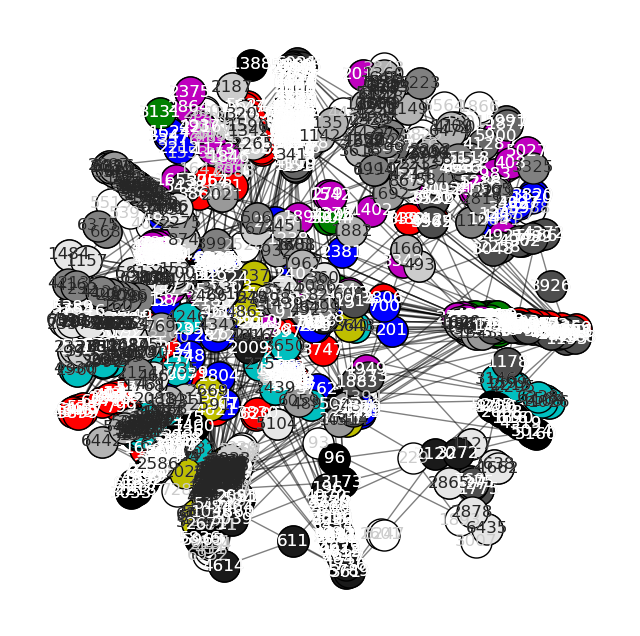

In [104]:
viz.plot_network_clusters(updated_G, coms_louvain, pos, plot_labels=True, node_size=500)
print("No. of Communities "+str(len(coms_louvain.communities)))
print("Community List: " + str(coms_louvain.communities))
print("Conductance: " + str(coms_louvain.conductance()))
print("Expansion: " + str(coms_louvain.expansion()))
print("Internal Density: " + str(coms_louvain.internal_edge_density()))

## Community Visualization

In [105]:
communities = nx.community.louvain_communities(G, seed=1)
print(f"Number of communities: {len(communities)}")

Number of communities: 26


In [106]:
communities_dict = {}

for i in range(len(communities)):
    for node in list(communities[i]):
        communities_dict[node] = i

nx.set_node_attributes(G, communities_dict, name='group')

In [108]:
nt = net(notebook=True, cdn_resources='remote', bgcolor="#222222", font_color="white",select_menu = True)
nt.repulsion()

nt.from_nx(G)
nt.show('twitch_communities.html')

twitch_communities.html
